In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

pd.set_option('display.max_columns', None)

In [2]:
testCSV = pd.read_csv("test.csv")
trainCSV = pd.read_csv("train.csv")

In [3]:
testCSV.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.439952,0.683758,1.225814,0.639113,0.716765,0.089295,0.657718,0.034213,-0.472679,0.352698,1.033706,-0.058832,-1.035406,0.514048,0.740893,-0.373862,-0.325962,0.360276,0.463212,0.211867,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493,0
1,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,-8.745973,5.416042,-8.164125,-0.165011,-10.193530,-1.895210,-7.360475,-14.668771,-4.877119,1.385610,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,1
2,1.013114,-0.334412,1.305208,0.837406,-1.126833,-0.064321,-0.594753,0.147737,0.536360,-0.120472,1.278799,1.600888,0.687623,-0.334877,-0.591809,0.271403,-0.391718,0.111543,0.148289,0.069161,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762,0


In [4]:
trainCSV.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0


In [4]:
def getInfos(x):
    return pd.Series(index=['min','max', 'range','mean', 'std'],data=[x.min(),x.max(),x.max() - x.min(),x.mean(),x.std()])

In [6]:
saida = testCSV.drop('Class', axis=1).apply(getInfos)

In [10]:
saida.T

,min,max,range,mean,std
V1,-56.407510,1.960497,58.368006,-0.249359,1.814058
V2,-72.715728,18.902453,91.618180,0.020785,1.610303
V3,-33.680984,9.382558,43.063542,0.673762,1.266014
V4,-5.519697,16.715537,22.235234,0.137174,1.322354
V5,-42.147898,34.801666,76.949564,-0.282937,1.305018
V6,-26.160506,22.529298,48.689804,0.078244,1.282539
V7,-31.764946,36.677268,68.442214,-0.118225,1.165527
V8,-73.216718,20.007208,93.223927,0.064970,1.233593
V9,-9.283925,15.594995,24.878919,-0.089146,1.090283
V10,-18.271168,23.745136,42.016304,-0.023005,1.052125


In [9]:
saida = trainCSV.drop('Class', axis=1).apply(getInfos)

In [8]:
testCSV['Class'].value_counts()

0    142180
1       223
Name: Class, dtype: int64

In [9]:
trainCSV['Class'].value_counts()

0    142135
1       269
Name: Class, dtype: int64

<IPython.core.display.Javascript object>


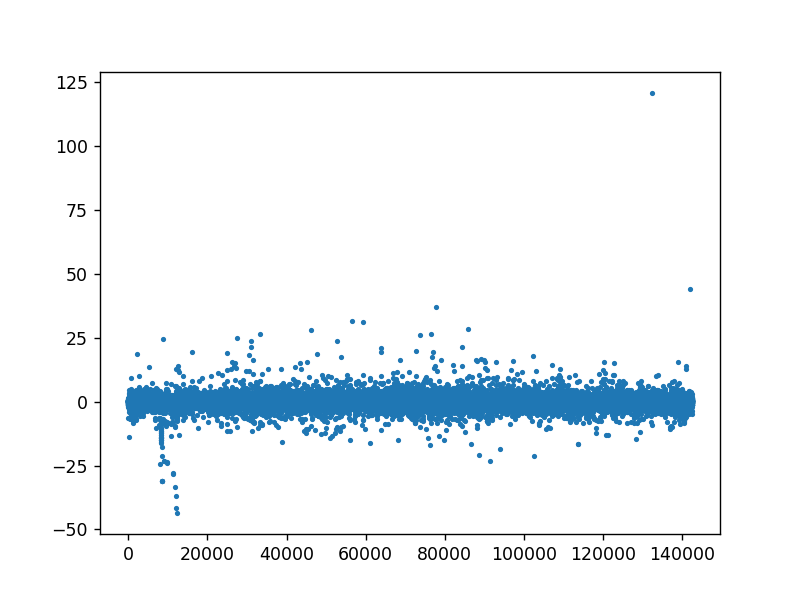

In [11]:
test = testCSV['V7'].to_numpy()
y = np.arange(start=1, stop=test.shape[0] + 1, step=1)

plt.figure(1)
plt.scatter(y, test, s = 4)
plt.show()

In [11]:
Ytest = testCSV["Class"].to_numpy()
Ytrain = trainCSV["Class"].to_numpy()

testCSV.drop('Class', axis=1, inplace=True)
trainCSV.drop('Class', axis=1, inplace=True)

Xtest = testCSV.to_numpy()
Xtrain = trainCSV.to_numpy()

In [12]:
type(Xtrain), type(Ytrain), type(Xtest), type(Ytest)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [13]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((142404, 28), (142404,), (142403, 28), (142403,))

In [14]:
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled  = scaler.transform(Xtest)
Ytrain_scaled = Ytrain
Ytest_scaled = Ytest


<IPython.core.display.Javascript object>


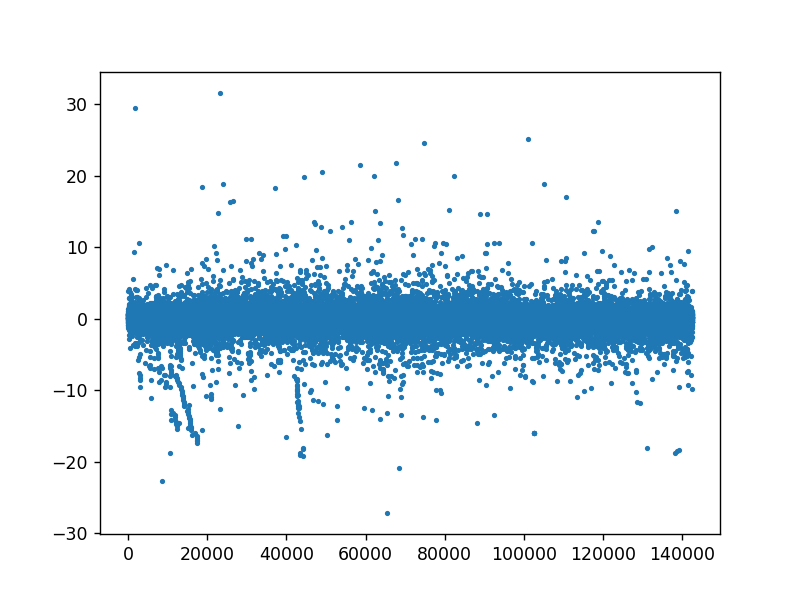

In [15]:
data = Xtrain_scaled[:,6].reshape(-1,1)

# data = trainCSV['V7'].to_numpy()
# y = np.arange(start=1, stop= data.shape[0] + 1, step=1)
# plt.scatter(y, data, s = 4)
# plt.show()

plt.figure(2)
y = np.arange(start=1, stop= data.shape[0] + 1, step=1)
plt.scatter(y, data, s = 4)
plt.show()
# scaled = scaler.fit_transform(data)